In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import socket
import os
import h5py
# import umap
import umap.umap_ as umap

hostname = socket.gethostname()
p = {}
if hostname == 'syndrome' or hostname == 'zod.psych.nyu.edu' or hostname == 'zod':
    p['datd'] = '/d/DATD/datd/MD_TMS_EEG'
else:
    p['datd'] = '/Users/mrugankdake/Documents/Clayspace/EEG_TMS/datd/MD_TMS_EEG'
p['data'] = p['datd'] + '/data'
p['analysis'] = p['datd'] + '/analysis'
p['EEGfiles'] = p['datd'] + '/EEGfiles'
p['meta'] = p['analysis'] + '/meta_analysis'
p['df_fname'] = os.path.join(p['meta'], 'calib_filtered.csv')
p['ALI_evoked'] = os.path.join(p['EEGfiles'], 'ALI_evoked_basecorr1.mat')
p['ALI_induced'] = os.path.join(p['EEGfiles'], 'ALI_induced_basecorr1.mat')
p['subjectALI_evoked'] = os.path.join(p['EEGfiles'], 'subjectALI_evoked.mat')
p['ALI_evoked_npz'] = os.path.join(p['EEGfiles'], 'ALI_evoked_basecorr1.npz')
p['ALI_induced_npz'] = os.path.join(p['EEGfiles'], 'ALI_induced_basecorr1.npz')
p['subjectALI_evoked_npz'] = os.path.join(p['EEGfiles'], 'subjectALI_evoked.npz')
p['master_evoked'] = os.path.join(p['EEGfiles'], 'masterTFR_evoked_basecorr0.mat')
p['master_evoked'] = '/Users/mrugank/Downloads/temp/masterTFR_evoked_basecorr0.mat'
p['mCDA'] = os.path.join(p['EEGfiles'], 'CDA.mat')
p['training_data'] = os.path.join(p['EEGfiles'], 'training_data.npy')
# Load up summary meta-data
summary_df = pd.read_csv(os.path.join(p['analysis'] + '/EEG_TMS_meta_Summary.csv'))
All_metadata = {row['Subject ID']: row for _, row in summary_df.iterrows()}

# Load up behavioral data
df_behav = pd.read_csv(p['df_fname'])
df_behav['trl_idx'] = df_behav['rnum'] * df_behav['tnum']

In [82]:
ch_label = {'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 
            'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6',
            'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'AF3',
            'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3',
            'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2',
            'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2',
            'FCz', 'Cz', 'AF4', 'AF7', 'AF8', 'Fp1', 'Fp2', 'Oz'}

with h5py.File(p['master_evoked'], 'r') as f:    
    freq_arr = np.array(f['mTFR']['NT']['pin']['all']['freq']).T[0]
    time_arr = np.array(f['mTFR']['NT']['pin']['all']['time']).T[0]
    nt_pin_pow = np.array(f['mTFR']['NT']['pin']['all']['powspctrm']).T
    nt_pout_pow = np.array(f['mTFR']['NT']['pout']['all']['powspctrm']).T
    t_pin_pow = np.array(f['mTFR']['T']['pin']['all']['powspctrm']).T
    t_pout_pow = np.array(f['mTFR']['T']['pout']['all']['powspctrm']).T

In [63]:
np.size(nt_pin_pow), np.sum(np.isnan(nt_pin_pow))

(9858000, 785872)

In [90]:
# Create average across subjects (not sure if this is a good idea since the power scales are likely very variable)
t_idx = np.where((time_arr > 0) & (time_arr < 4.5))[0]
f_idx = np.where(freq_arr > 8)[0]

mp1 = nt_pin_pow[:, f_idx, :, :]
mp2 = nt_pout_pow[:, f_idx, :, :]
mp3 = t_pin_pow[:, f_idx, :, :]
mp4 = t_pout_pow[:, f_idx, :, :]

mp1 = mp1[:, :, t_idx, :]
mp2 = mp2[:, :, t_idx, :]
mp3 = mp3[:, :, t_idx, :]
mp4 = mp4[:, :, t_idx, :]

nt_pin_pow_subave = np.mean(mp1, axis = 3)
nt_pout_pow_subave = np.mean(mp2, axis = 3)
t_pin_pow_subave = np.mean(mp3, axis = 3)
t_pout_pow_subave = np.mean(mp4, axis = 3)
# nt_pin_pow_subave = np.mean(nt_pin_pow[:, f_idx, t_idx, :], axis=3)
# nt_pout_pow_subave = np.mean(nt_pout_pow[:, f_idx, t_idx, :], axis=3)
# t_pin_pow_subave = np.mean(t_pin_pow[:, f_idx, t_idx, :], axis=3)
# t_pout_pow_subave = np.mean(t_pout_pow[:, f_idx, t_idx, :], axis=3)

In [102]:
aa = np.sum(np.isnan(_pin_pow_subave), axis=(1, 2))
np.shape(aa)

(62,)

In [103]:
aa

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

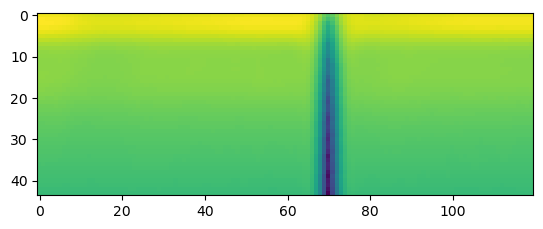

In [106]:
plt.figure()
plt.imshow(np.mean(t_pin_pow_subave, axis=0))
# plt.imshow(np.mean(nt_pin_pow_subave, axis=0), aspect='auto', origin='lower', extent=[time_arr[t_idx[0]], time_arr[t_idx[-1]], freq_arr[f_idx[0]], freq_arr[f_idx[-1]]])

/users/mrugank/.conda/envs/eegmne/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


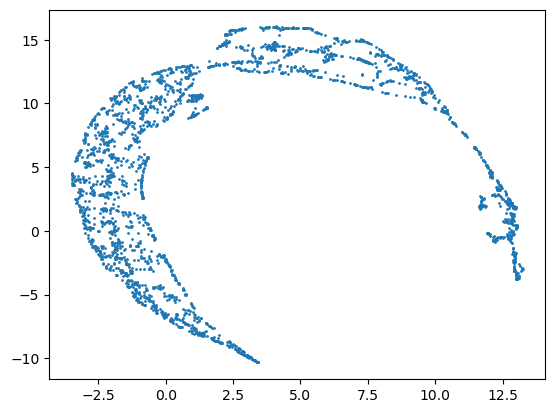

In [108]:
reducer = umap.UMAP(random_state=42)
t_pin_pow_subave_umap = reducer.fit_transform(t_pin_pow_subave.reshape(-1, t_pin_pow_subave.shape[-1]))

plt.figure()
plt.scatter(t_pin_pow_subave_umap[:, 0], t_pin_pow_subave_umap[:, 1], s=1)
plt.show()
